In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
from tqdm import tqdm

In [2]:
df = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [3]:
df.date_time = pd.to_datetime(df.date_time)

In [4]:
df = df[df['태양광보유']==0]

In [5]:
eda_df = df[['num','date_time','전력사용량(kWh)']]

In [6]:
eda_df

,num,date_time,전력사용량(kWh)
0,1,2020-06-01 00:00:00,8179.056
1,1,2020-06-01 01:00:00,8135.640
2,1,2020-06-01 02:00:00,8107.128
3,1,2020-06-01 03:00:00,8048.808
4,1,2020-06-01 04:00:00,8043.624
...,...,...,...
120355,59,2020-08-24 19:00:00,1186.164
120356,59,2020-08-24 20:00:00,929.232
120357,59,2020-08-24 21:00:00,1003.104
120358,59,2020-08-24 22:00:00,1110.672


In [7]:
eda_df['month'] = 0
eda_df['hour'] = 0
eda_df['day'] = 0
eda_df['요일'] = 0

In [8]:
days = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'}

In [9]:
eda_df['month'] = eda_df.date_time.dt.month
eda_df['hour'] = eda_df.date_time.dt.hour
eda_df['day'] = eda_df.date_time.dt.day
# eda_df['요일'] = eda_df['date_time'].dt.weekday.map(days)
eda_df['요일'] = eda_df['date_time'].dt.weekday

In [10]:
eda_df

,num,date_time,전력사용량(kWh),month,hour,day,요일
0,1,2020-06-01 00:00:00,8179.056,6,0,1,0
1,1,2020-06-01 01:00:00,8135.640,6,1,1,0
2,1,2020-06-01 02:00:00,8107.128,6,2,1,0
3,1,2020-06-01 03:00:00,8048.808,6,3,1,0
4,1,2020-06-01 04:00:00,8043.624,6,4,1,0
...,...,...,...,...,...,...,...
120355,59,2020-08-24 19:00:00,1186.164,8,19,24,0
120356,59,2020-08-24 20:00:00,929.232,8,20,24,0
120357,59,2020-08-24 21:00:00,1003.104,8,21,24,0
120358,59,2020-08-24 22:00:00,1110.672,8,22,24,0


import seaborn as sns

# 요일과 시간에 대한 2D KDE 플롯 그리기
sns.kdeplot(x=eda_df['요일'], y=eda_df['hour'], cmap='viridis', fill=True)

plt.xlabel('Day of Week')
plt.ylabel('Hour')

plt.show()


In [11]:
average_values = eda_df.groupby(['요일', 'hour'])['전력사용량(kWh)'].mean().unstack().values
variance_values = eda_df.groupby(['요일', 'hour'])['전력사용량(kWh)'].var().unstack().values
std_values = eda_df.groupby(['요일', 'hour'])['전력사용량(kWh)'].std().unstack().values

In [12]:
from matplotlib.ticker import FuncFormatter

In [13]:
eda_df

,num,date_time,전력사용량(kWh),month,hour,day,요일
0,1,2020-06-01 00:00:00,8179.056,6,0,1,0
1,1,2020-06-01 01:00:00,8135.640,6,1,1,0
2,1,2020-06-01 02:00:00,8107.128,6,2,1,0
3,1,2020-06-01 03:00:00,8048.808,6,3,1,0
4,1,2020-06-01 04:00:00,8043.624,6,4,1,0
...,...,...,...,...,...,...,...
120355,59,2020-08-24 19:00:00,1186.164,8,19,24,0
120356,59,2020-08-24 20:00:00,929.232,8,20,24,0
120357,59,2020-08-24 21:00:00,1003.104,8,21,24,0
120358,59,2020-08-24 22:00:00,1110.672,8,22,24,0


In [14]:
one_df = eda_df[eda_df['num']== 1]

In [15]:
average_values = one_df.groupby(['요일', 'hour'])['전력사용량(kWh)'].mean().unstack().values
variance_values = one_df.groupby(['요일', 'hour'])['전력사용량(kWh)'].var().unstack().values
std_values = one_df.groupby(['요일', 'hour'])['전력사용량(kWh)'].std().unstack().values

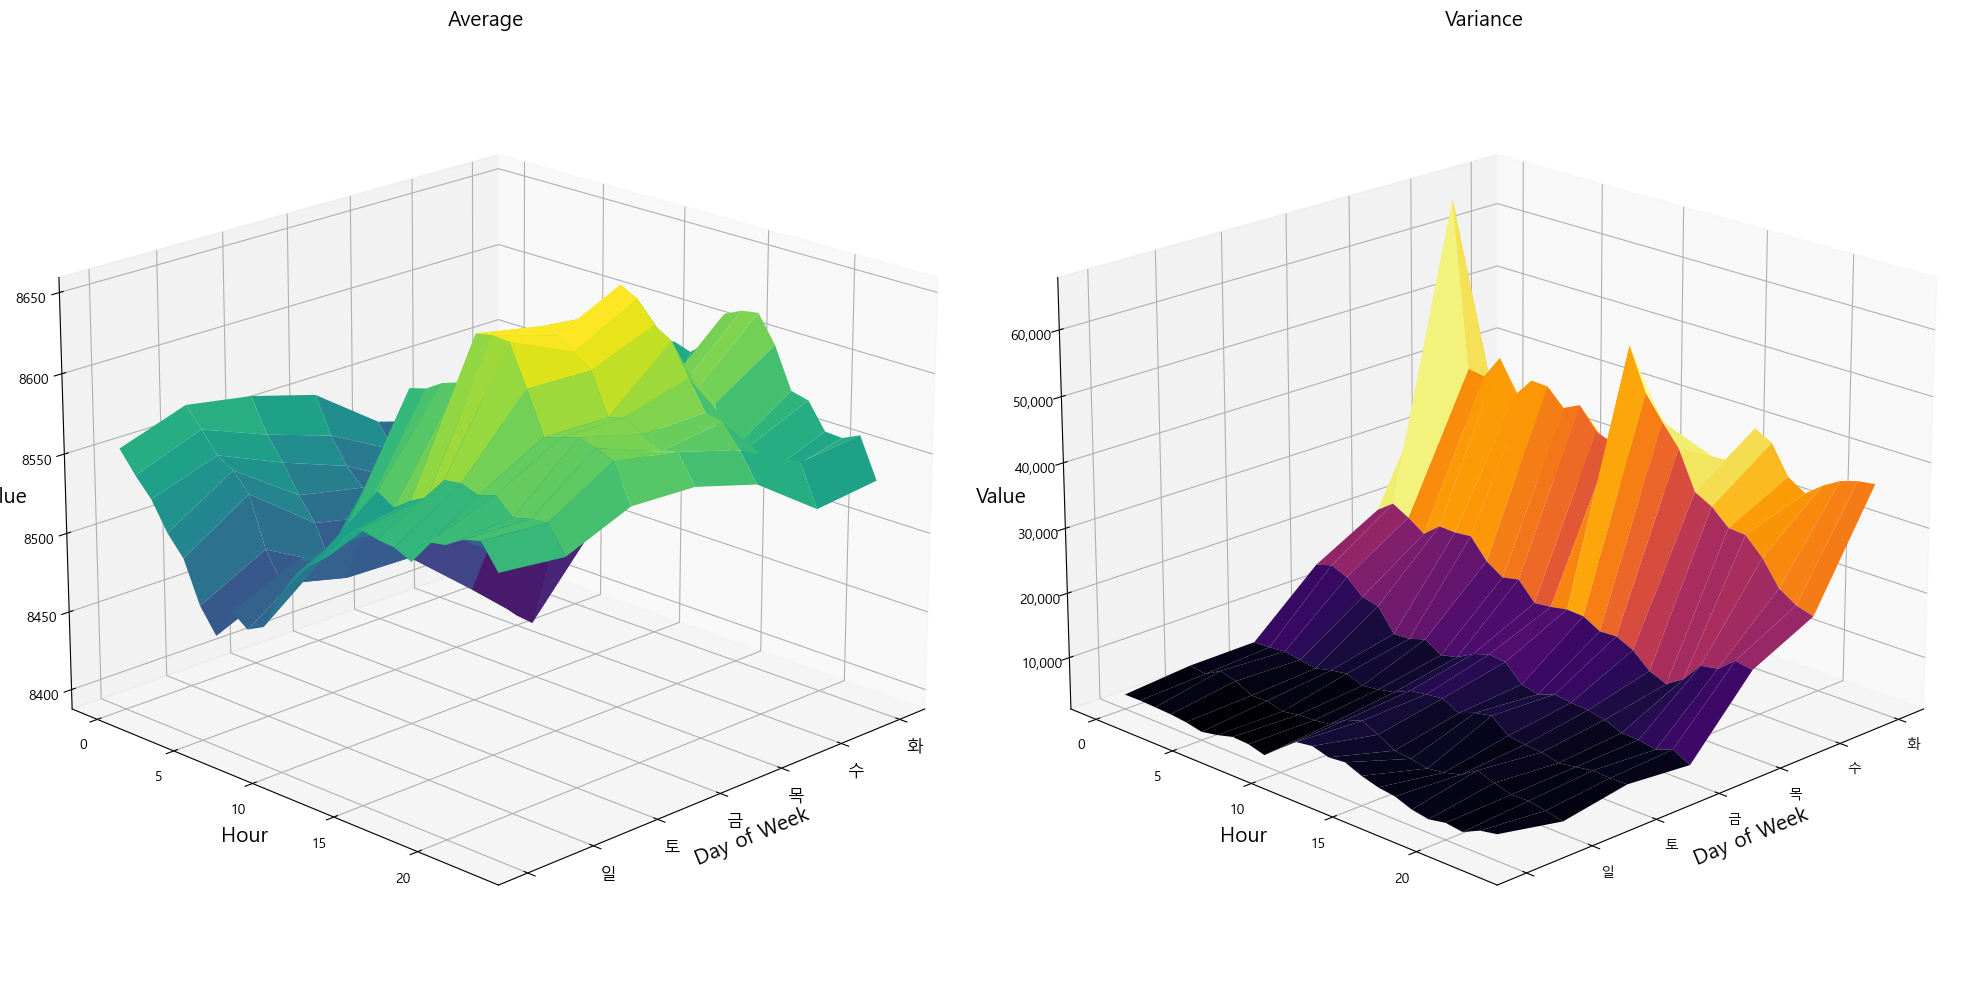

In [16]:
Y, X = np.meshgrid(one_df['hour'].unique(), one_df['요일'].unique())

fig = plt.figure(figsize=(20, 12))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, average_values, cmap='viridis')
ax1.set_title('Average', fontsize = 15)
ax1.set_xlabel('Day of Week', fontsize = 15)
ax1.set_ylabel('Hour', fontsize = 15)
ax1.set_zlabel('Value', fontsize = 15)
ax1.set_xticklabels(['월', '화', '수', '목', '금', '토', '일'], fontsize = 12)
ax1.view_init(20, 45)

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, Y, variance_values, cmap='inferno')
ax2.set_title('Variance', fontsize = 15)
ax2.set_xlabel('Day of Week', fontsize = 15)
ax2.set_ylabel('Hour', fontsize = 15)
ax2.set_zlabel('Value', fontsize = 15)
ax2.set_xticklabels(['월', '화', '수', '목', '금', '토', '일'])
ax2.get_zaxis().set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax2.view_init(20, 45)


for ax in [ax1, ax2]:
    ax.zaxis.set_rotate_label(False)  # 레이블이 회전되지 않도록 합니다.
    ax.zaxis.labelpad = 5            # 레이블과 축 간의 간격을 설정합니다.
    ax.zaxis.label.set_y(0.95)        # 레이블의 y 위치를 설정합니다.


plt.tight_layout()
plt.subplots_adjust(left=0.005, right=0.98, top=0.99, bottom=0.01, wspace=0.05) 
plt.show()


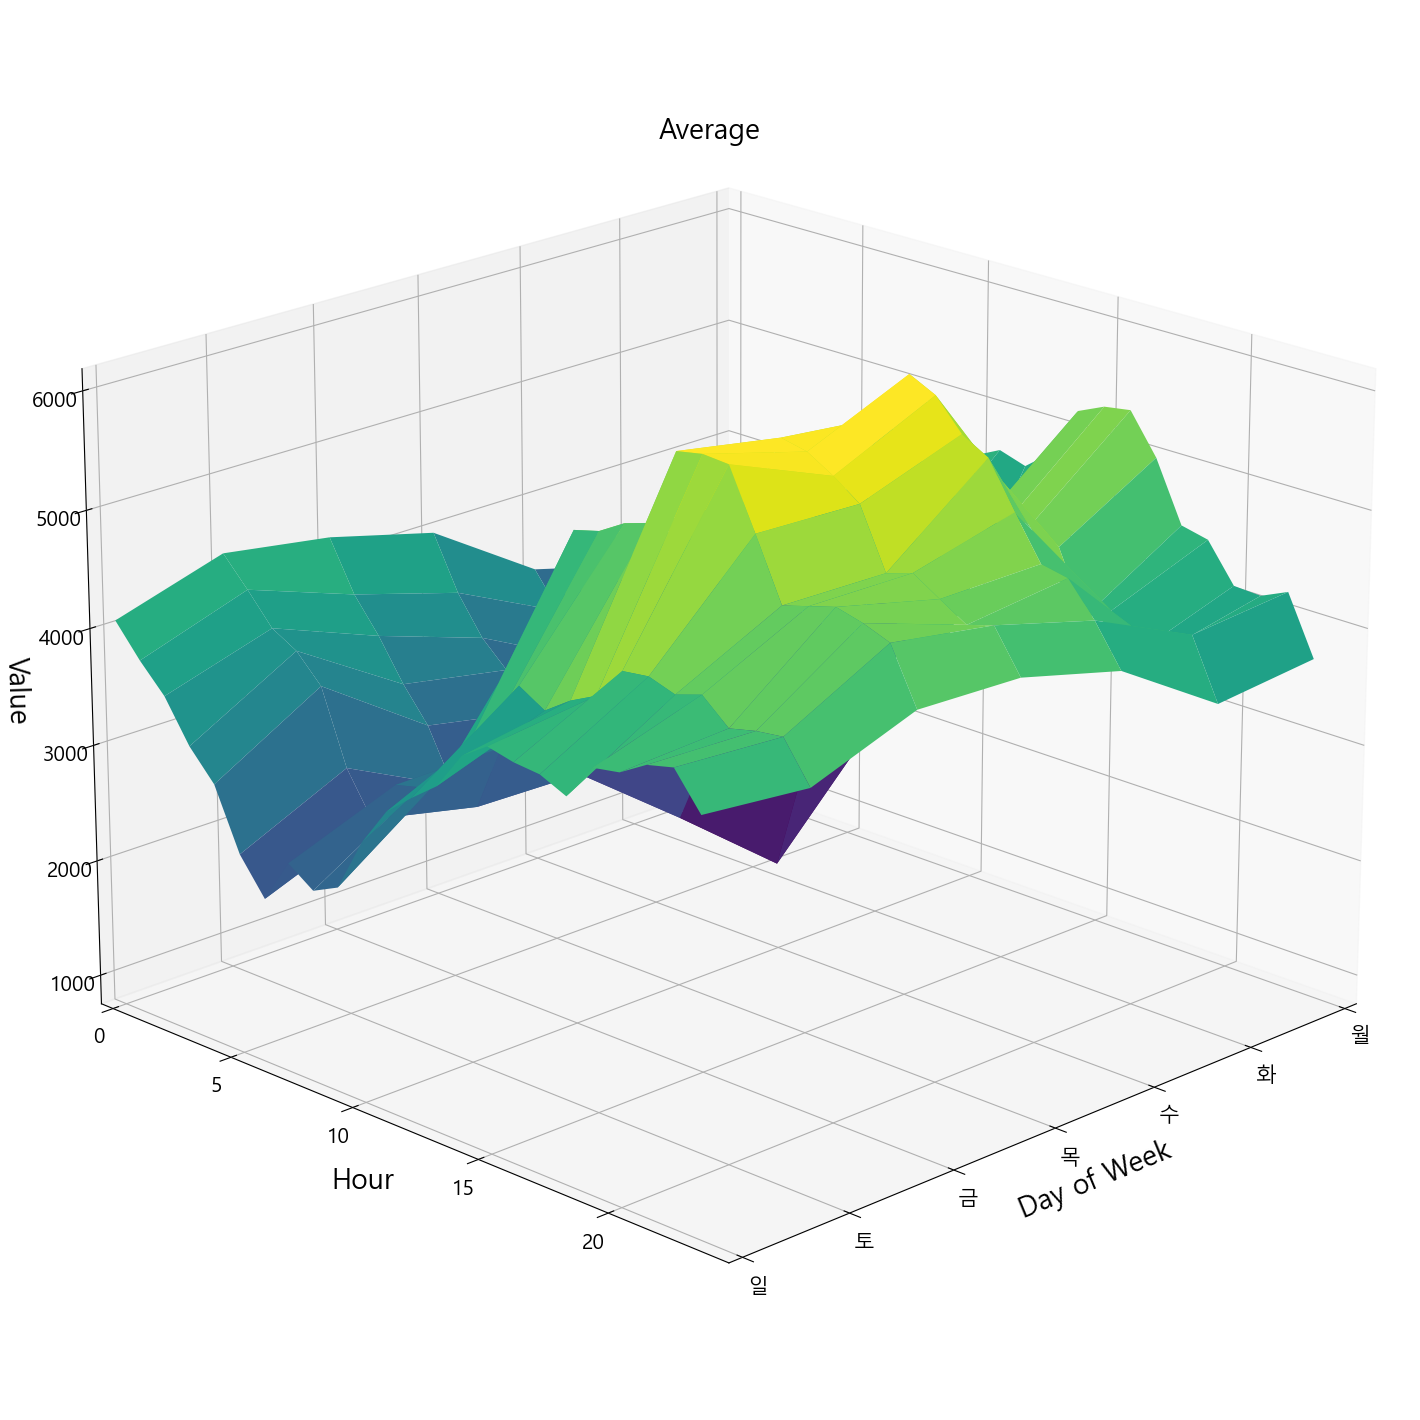

In [17]:
fig = plt.figure(figsize=(30, 20))

ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_surface(X, Y, average_values, cmap='viridis')
ax1.set_title('Average', fontsize = 20, y=0.98)
ax1.set_xlabel('Day of Week', fontsize = 20, labelpad=10)
ax1.set_ylabel('Hour', fontsize = 20, labelpad=10)
ax1.set_zlabel('Value', fontsize = 20, labelpad=10, rotation=90)
ax1.set_xticklabels(['월', '화', '수', '목', '금', '토', '일'], fontsize = 15)
ax1.set_yticklabels([Y for Y in range(0, 25, 5)], fontsize = 15)
ax1.set_zticklabels([Z for Z in range(0, 10000, 1000)], fontsize = 15)
ax1.set_ylim(0,24)
ax1.set_xlim(0,6)
ax1.view_init(20, 45)
plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95, top=0.75, bottom=0.05)
plt.show()

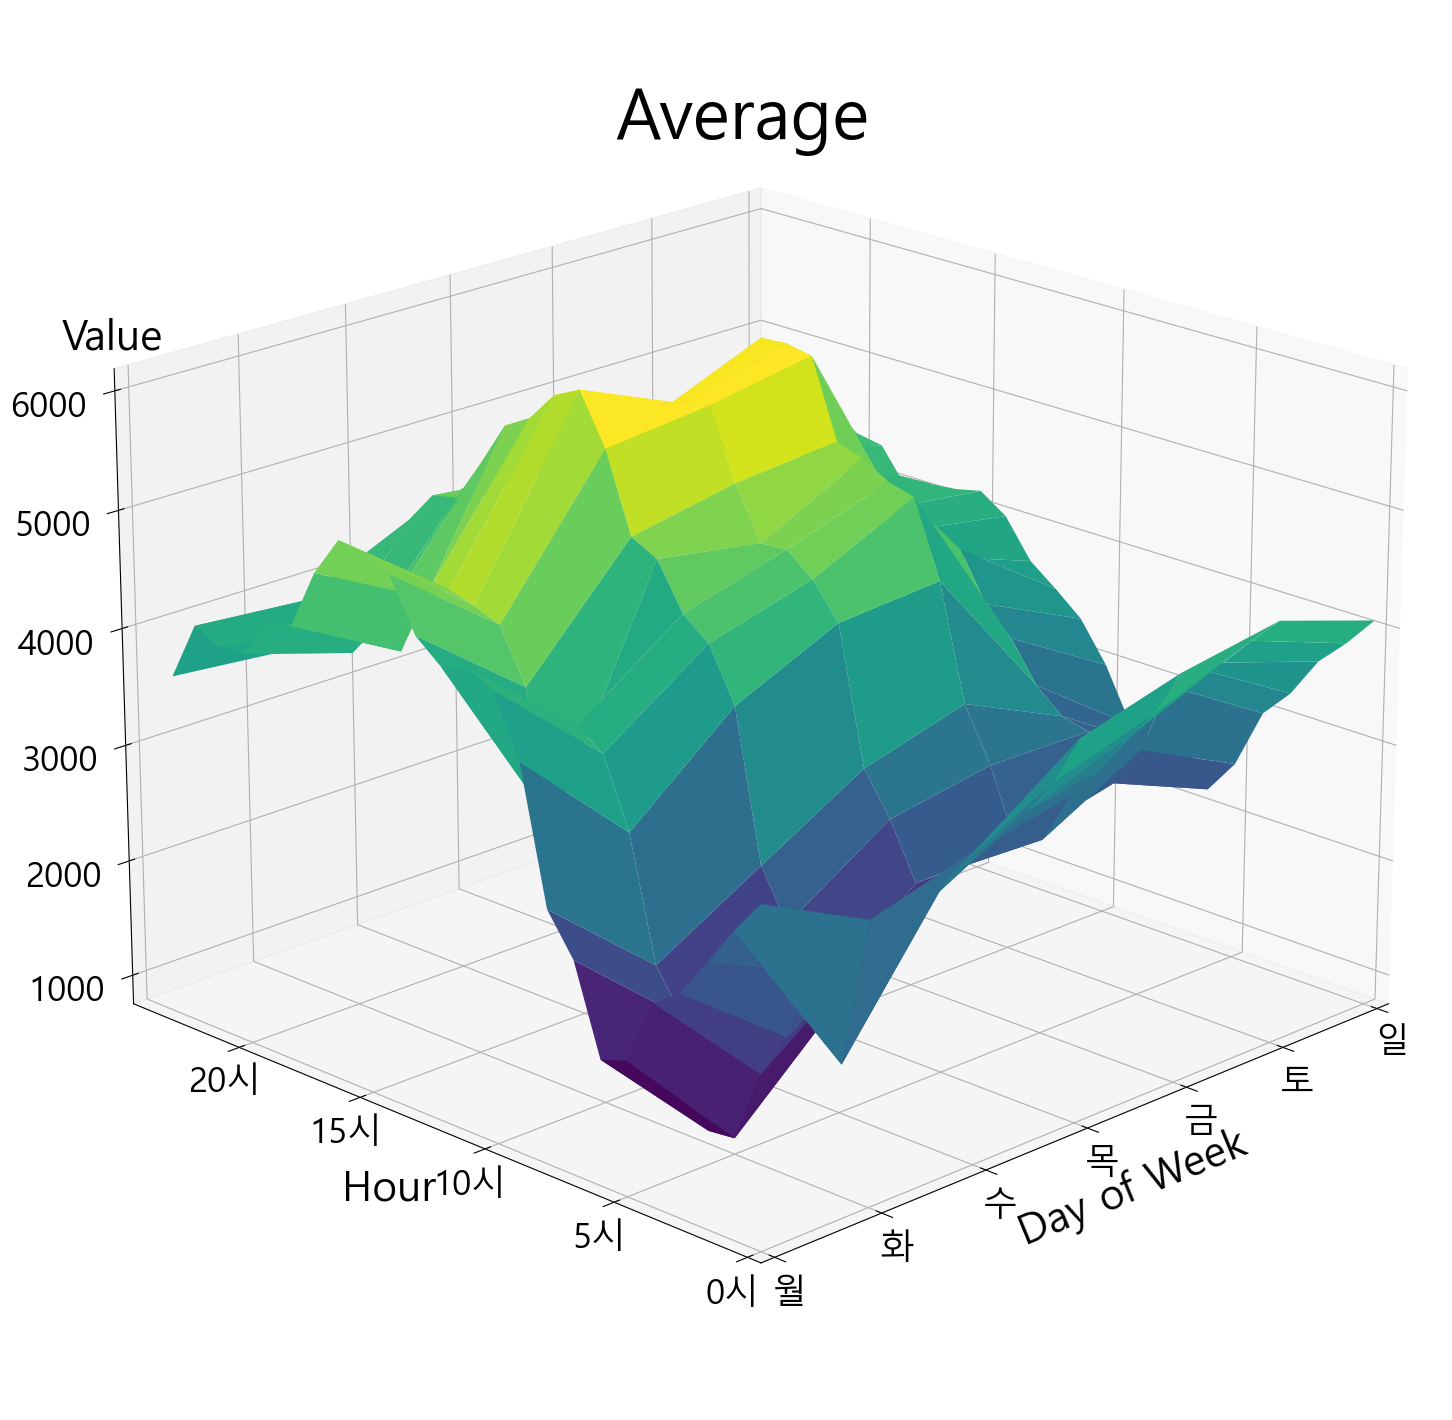

In [18]:
fig = plt.figure(figsize=(30, 20))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_surface(X, Y, average_values, cmap='viridis')

ax1.set_title('Average', fontsize=50, y=0.98)
ax1.set_xlabel('Day of Week', fontsize=30, labelpad=15)
ax1.set_ylabel('Hour', fontsize=30, labelpad=15)
ax1.set_xticklabels(['월', '화', '수', '목', '금', '토', '일'], fontsize=25)
ax1.set_yticklabels([str(i) + '시' for i in range(0,25,5)], fontsize=25)
#ax1.set_yticklabels([Y for Y in range(0, 25, 5)], fontsize=20)
ax1.set_zticklabels([Z for Z in range(0, 10000, 1000)], fontsize=25, ha='right')
ax1.set_ylim(0, 24)
ax1.set_xlim(0, 6)
ax1.view_init(20, 225)

# z축 레이블 직접 그리기
ax1.text2D(0.05, 0.78, 'Value', rotation=0, va='top', ha='center', transform=ax1.transAxes, fontsize=30)

plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95, top=0.75, bottom=0.05)
plt.show()


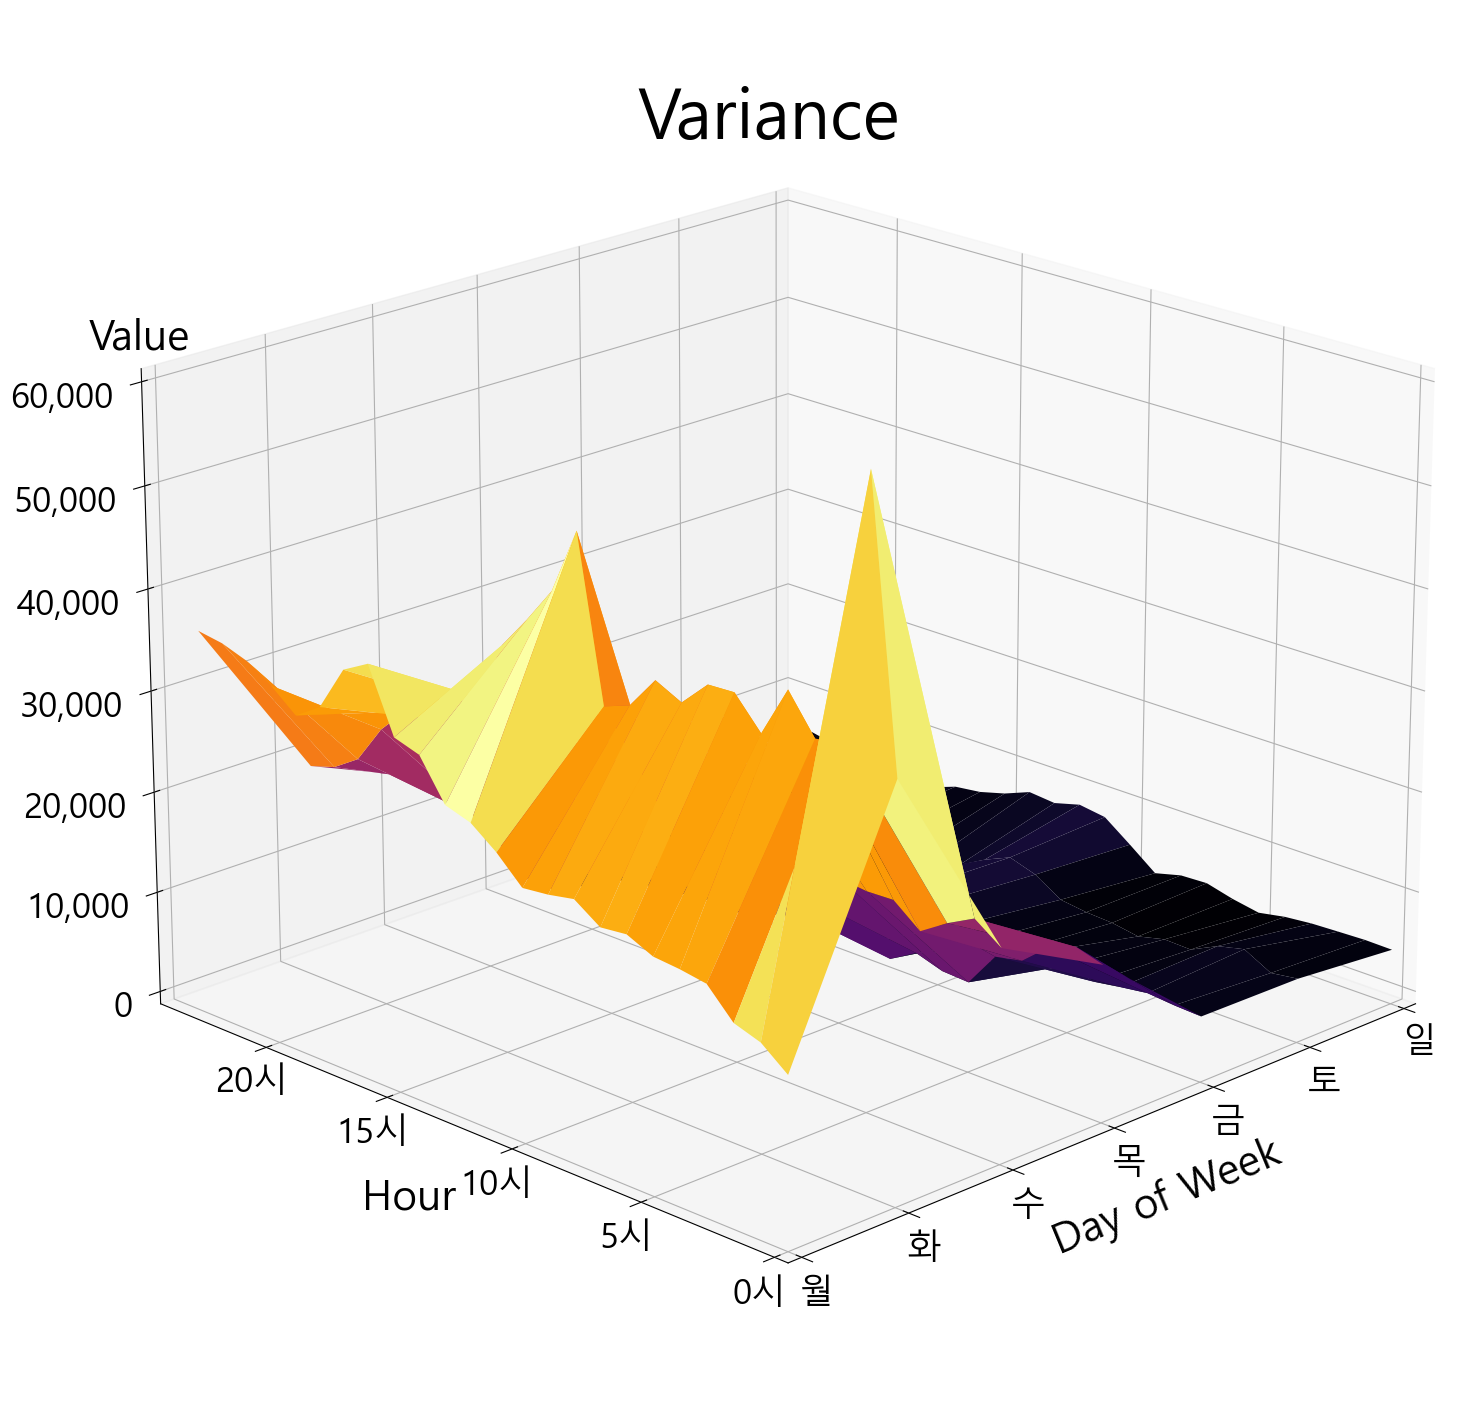

In [25]:
fig2 = plt.figure(figsize=(30, 20))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(X, Y, variance_values, cmap='inferno')

ax2.set_title('Variance', fontsize=50, y=0.98)
ax2.set_xlabel('Day of Week', fontsize=30, labelpad=20)
ax2.set_ylabel('Hour', fontsize=30, labelpad=20)

ax2.set_xticklabels(['월', '화', '수', '목', '금', '토', '일'], fontsize=25)
ax2.set_yticklabels([str(i) + '시' for i in range(0,25,5)], fontsize=25)
ax2.set_zticklabels([x for x in range(0, 200000, 50000)], fontsize=25, ha='right')

ax2.get_zaxis().set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

ax2.set_ylim(0,24)
ax2.set_xlim(0,6)
ax2.set_zlim(0,60000)
ax2.view_init(20, 225)

ax2.text2D(0.05, 0.78, 'Value', rotation=0, va='top', ha='center', transform=ax2.transAxes, fontsize=30)

plt.tight_layout()
plt.subplots_adjust(left=0.005, right=0.95, top=0.75, bottom=0.05)
plt.show()


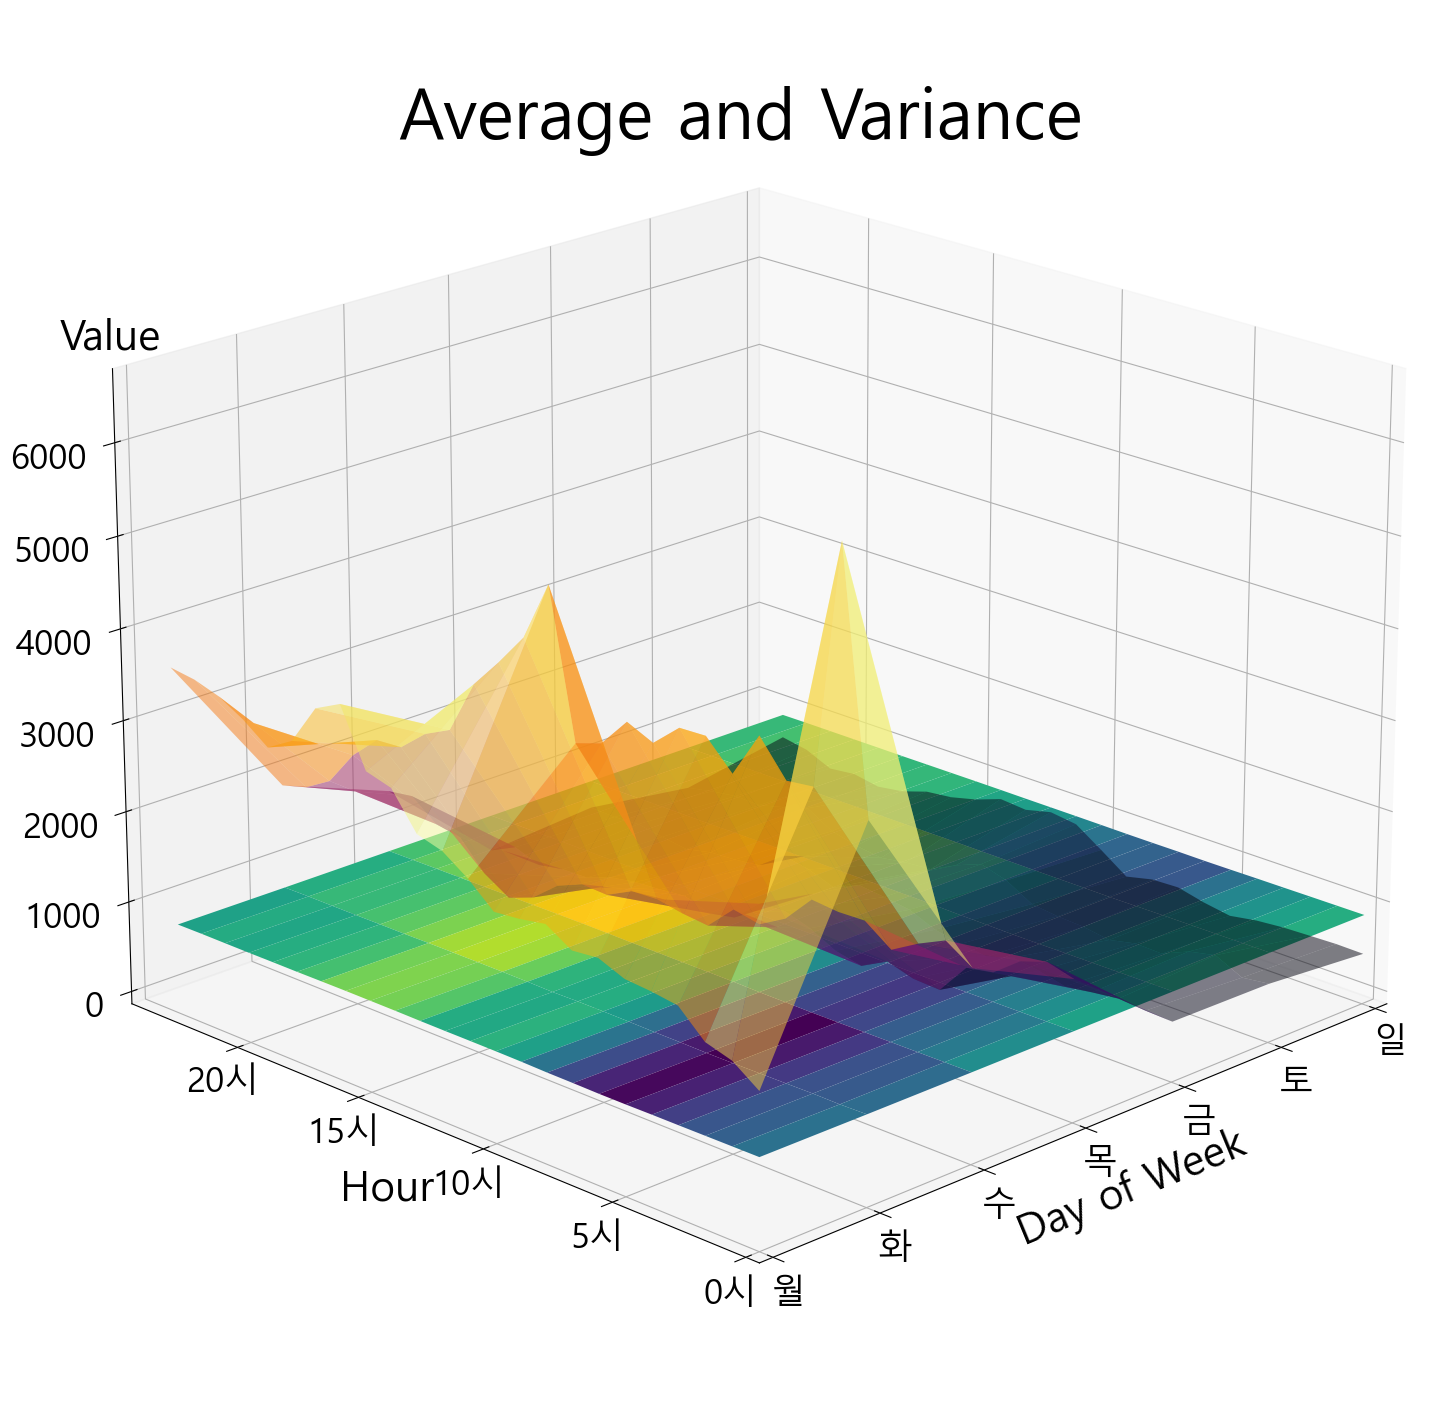

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 평균과 분산 데이터가 있는 2D 배열로 가정합니다.
# X, Y는 평균과 분산을 플로팅하기 위한 meshgrid입니다.

fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111, projection='3d')

# 평균을 표면으로 표시
surf = ax.plot_surface(X, Y, average_values, cmap='viridis', label='Average')

# 분산을 표면 위에 투명한 표면으로 표시
var_surf = ax.plot_surface(X, Y, variance_values, cmap='inferno', alpha=0.5, label='Variance')

ax.set_title('Average and Variance', fontsize=50, y=0.98)
ax.set_xlabel('Day of Week', fontsize=30, labelpad=15)
ax.set_ylabel('Hour', fontsize=30, labelpad=15)
ax.set_xticklabels(['월', '화', '수', '목', '금', '토', '일'], fontsize=25)
ax.set_yticklabels([str(i) + '시' for i in range(0,25,5)], fontsize=25)
ax.set_zticklabels([str(i) for i in range(0, 10000, 1000)], fontsize=25, ha='right')

ax.set_ylim(0, 24)
ax.set_xlim(0, 6)
ax.set_zlim(0, max(np.max(average_values), np.max(variance_values))) # z축의 범위를 데이터에 맞게 조정
ax.view_init(20, 225)

# z축 레이블 직접 그리기
ax.text2D(0.05, 0.78, 'Value', rotation=0, va='top', ha='center', transform=ax.transAxes, fontsize=30)

plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95, top=0.75, bottom=0.05)
plt.show()


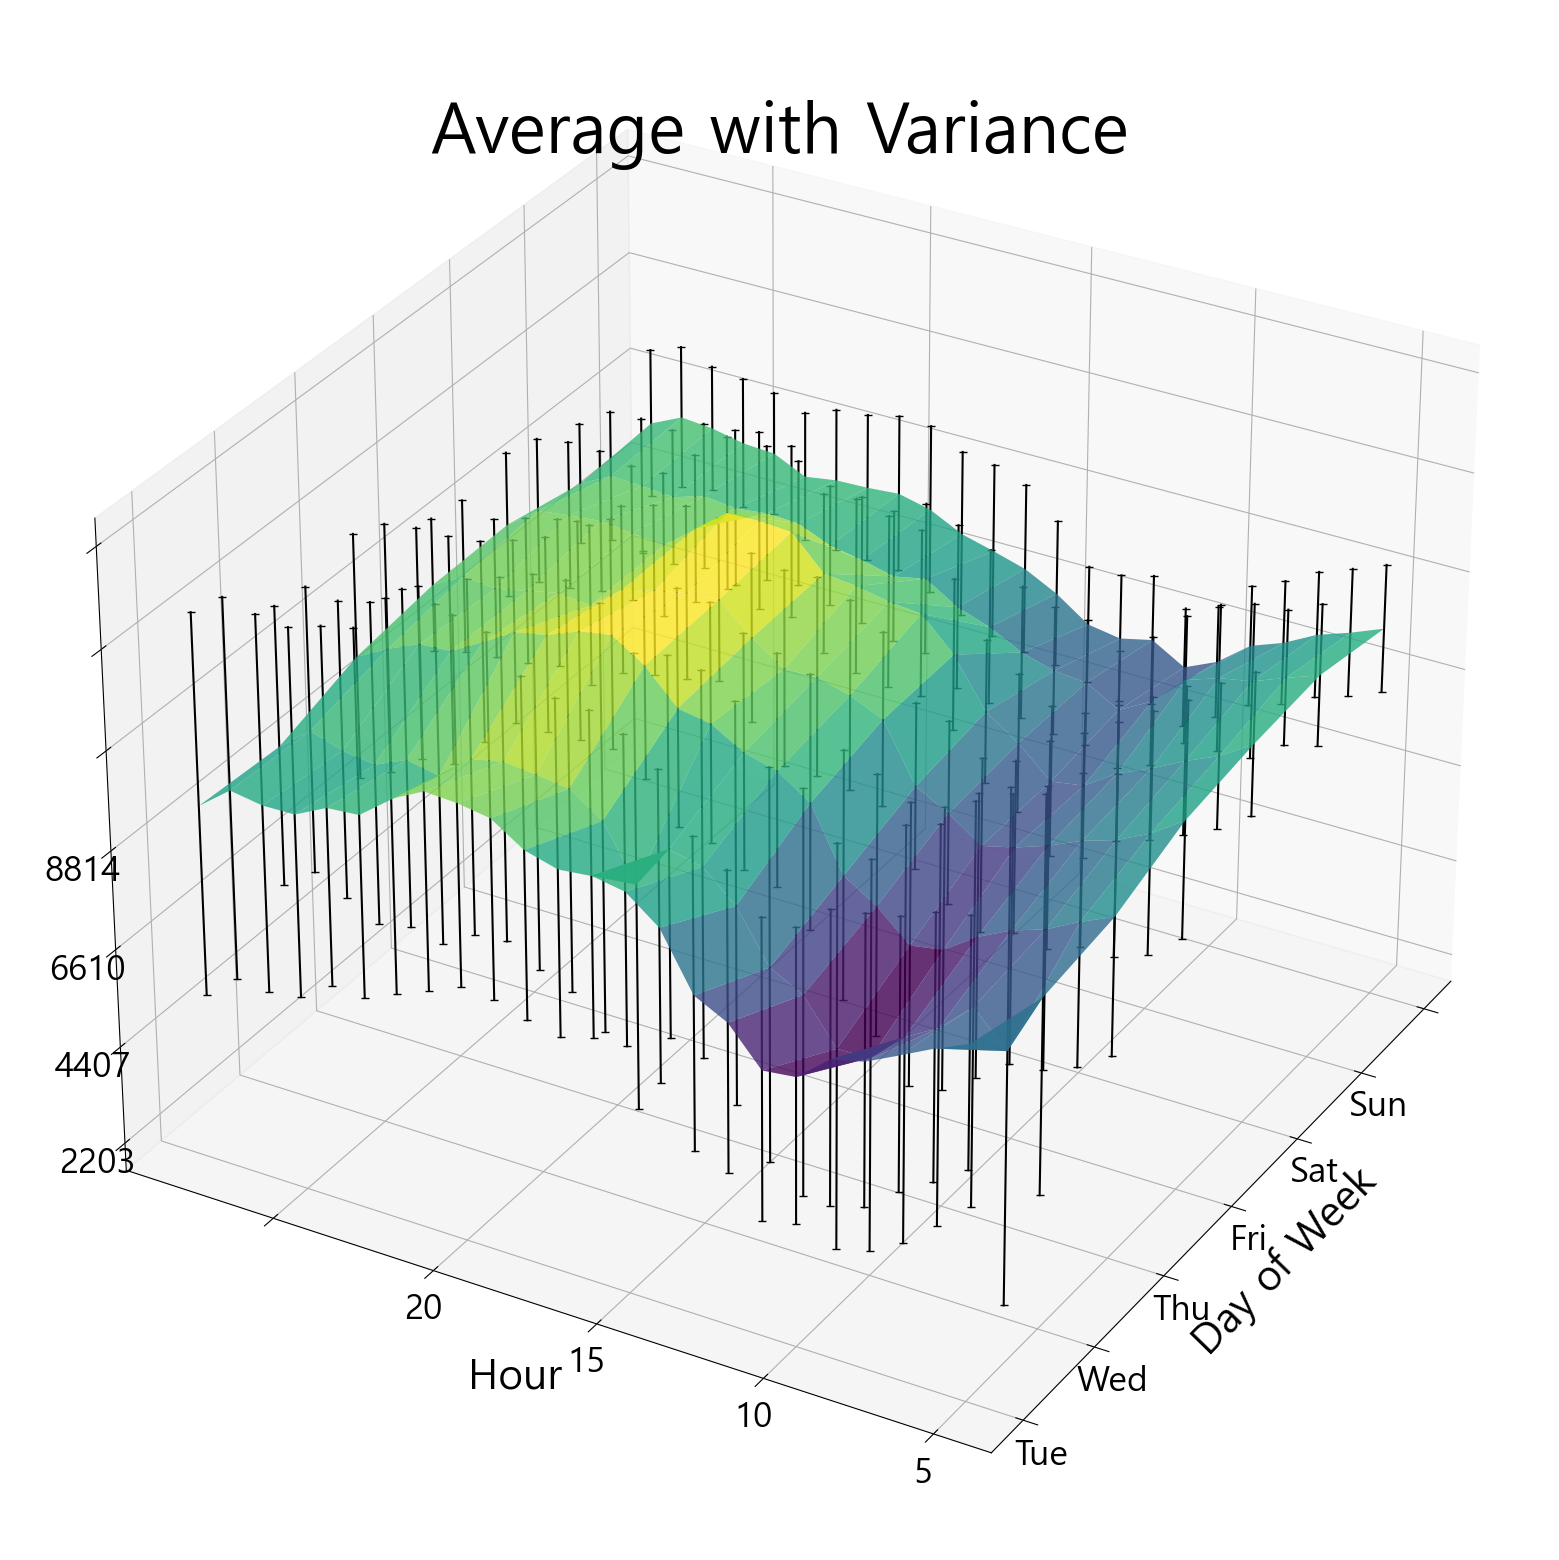

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# X, Y, average_values, variance_values 배열이 이미 정의되었다고 가정합니다.
# average_values는 각 (x, y) 포인트에서의 평균을 나타냅니다.
# variance_values는 각 (x, y) 포인트에서의 분산 값을 나타냅니다.

fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111, projection='3d')

# 평균을 표면으로 표시
surf = ax.plot_surface(X, Y, average_values, cmap='viridis', rstride=1, cstride=1, alpha=0.8, edgecolor='none')

# 분산을 오차 막대로 표현
# 분산 값이 아닌 표준 편차 값을 오차로 사용합니다.
std_dev = np.sqrt(variance_values)

# X, Y 그리드 포인트에 대해 오차 막대를 그립니다.
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        ax.plot([X[i, j], X[i, j]], [Y[i, j], Y[i, j]], [average_values[i, j] - std_dev[i, j], average_values[i, j] + std_dev[i, j]], marker="_", color='k')

ax.set_title('Average with Variance', fontsize=50, y=0.98)
ax.set_xlabel('Day of Week', fontsize=30, labelpad=15)
ax.set_ylabel('Hour', fontsize=30, labelpad=15)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=25)
ax.set_yticklabels([str(i) for i in range(0, 25, 5)], fontsize=25)
ax.set_zticklabels([str(int(i)) for i in np.linspace(0, np.max(average_values + std_dev), num=5)], fontsize=25)

# Z축 범위를 설정합니다.
ax.set_zlim(np.min(average_values - std_dev), np.max(average_values + std_dev))

ax.view_init(30, 210)  # 시각화 각도를 조정합니다.

plt.tight_layout()
plt.show()


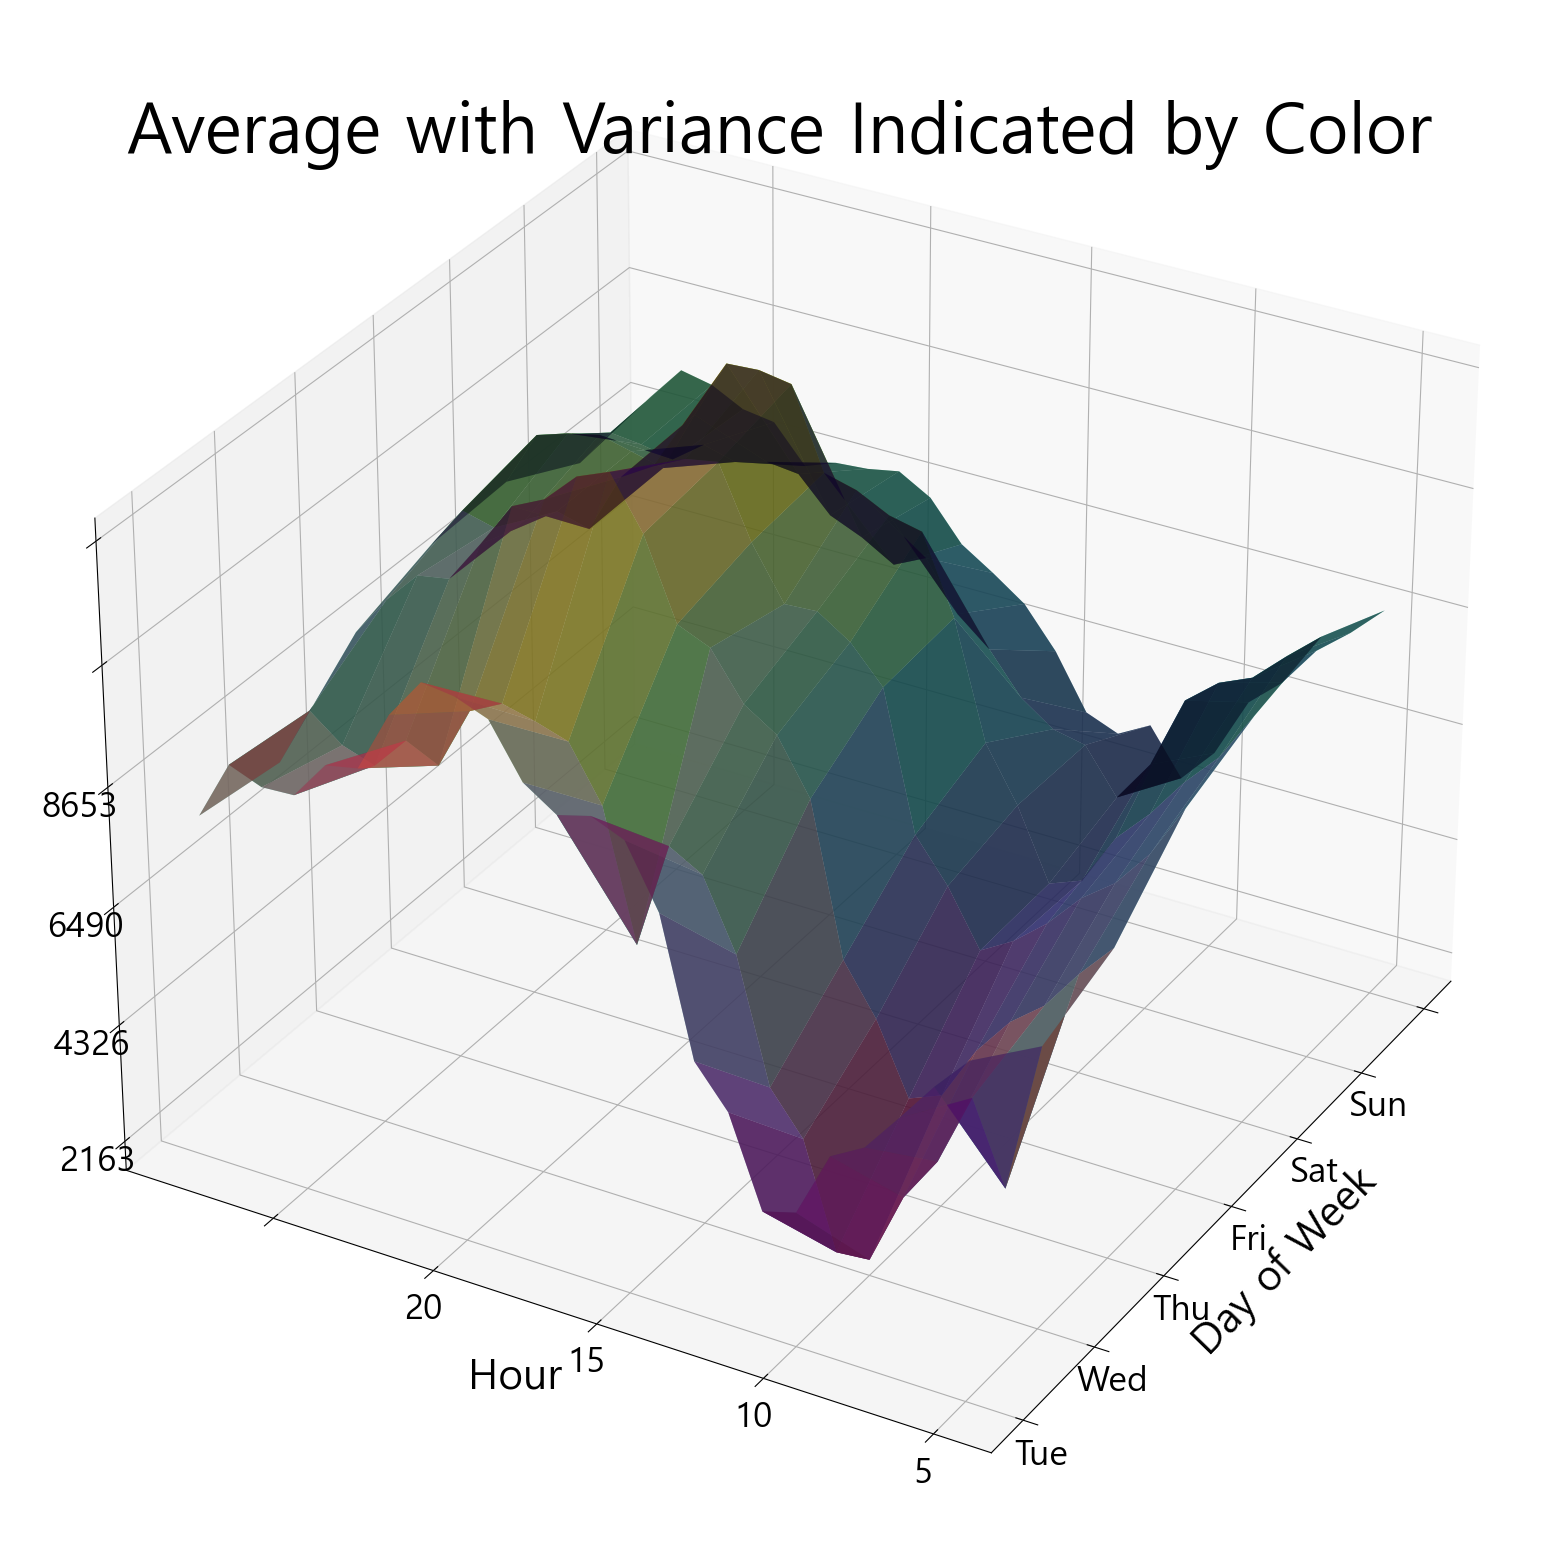

In [32]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, average_values, cmap='viridis', rstride=1, cstride=1, alpha=0.8, edgecolor='none')

variance_normalized = variance_values / np.max(variance_values)
colors = plt.cm.inferno(variance_normalized)

# 평균 표면에 분산에 따른 색상을 적용합니다.
surf_variance = ax.plot_surface(X, Y, average_values, facecolors=colors, rstride=1, cstride=1, alpha=0.5, edgecolor='none')

ax.set_title('Average with Variance Indicated by Color', fontsize=50, y=0.98)
ax.set_xlabel('Day of Week', fontsize=30, labelpad=15)
ax.set_ylabel('Hour', fontsize=30, labelpad=15)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=25)
ax.set_yticklabels([str(i) for i in range(0, 25, 5)], fontsize=25)
ax.set_zticklabels([str(int(i)) for i in np.linspace(0, np.max(average_values), num=5)], fontsize=25)

# Z축 범위를 설정합니다.
ax.set_zlim(np.min(average_values), np.max(average_values))

ax.view_init(30, 210)  # 시각화 각도를 조정합니다.

plt.tight_layout()
plt.show()
